# Lecture 6 
* Combinatorics
* Bayes' Theorem and Applications
* Exploratory Data Analysis
* Hypothesis Testing
* Bootstrap Sampling

These are some of the theorems and corollaries that we have learned so far:

* $\forall E\in\mathcal{F}, 0 \leq P(E)\leq 1$
* $P(\Omega)=1$ and $P(\emptyset) = 0 $
* $P(A^c) = P(\overline{A}) = 1 - P(A)$
* If $A\subset B$, then $P(A)\leq P(B)$
* **DeMorgan's Law 1**: $\overline{A\cap B} = \overline{A}\cup\overline{B}$  
* **DeMorgan's Law 2**: $\overline{A\cup B} = \overline{A}\cap\overline{B}$
* $P(A\cap B) = P(A) + P(B) - P(A\cup B)$
* If $A$ and $B$ are M.E. then $A\cap B=\emptyset \Rightarrow P(A\cap B) = 0$
* **Conditional Probability**: $P(A|B) = \frac{P(A\cap B)}{P(B)}$, for $P(B)>0$
* **Chain Rules**: $P(A\cap B) = P(A|B)P(B)$ and $P(A\cap B) = P(B|A)P(A)$
* **Multiplication Rule**: $P(\bigcap_{i=1}^n A_i) = P(A_1)P(A_2|A_1)P(A_3|A_1\cap A_2)\dots P\left(A_n|A_1\cap\dots \cap A_{n-1}\right)$
* **Total Probability**: if a set of events $\{C_i\}_{i=1}^n$ are partitions of the sample space $\Omega$, then $P(A) = \sum_{i=1}^n P(A|C_i)P(C_i)$
* **Statistical Independence:** two events $A, B\in\mathcal{F}$ are statistical independent (s.i.) if and only if (iff) $P(A\cap B)=P(A)P(B)$
* If $A$ is statistically independent of $B$, then $B$ is statistically independent of $A$.
* If $A, B\in\mathcal{F}$ are s.i., then $A$ and $\bar{B}$ are s.i., $\bar{A}$ and $B$ are s.i., and $\bar{A}$ and $\bar{B}$ are s.i..
* **Conditional Independence:** Given an event $C$, the events $A$ and $B$ are said to be conditionally independent if $P(A\cap B|C) = P(A|C)P(B|C)$
* Conditionally independent events are not necessary statistically independent.

In [1]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import itertools

Library API for [itertools](https://docs.python.org/3/library/itertools.html).

___

# Combinatorics

<div class="alert alert-info">
    
A **combined experiment** is one in which the outcome is a tuple that takes one outcome from each of a sequence of subexperiments.
</div>

<div class="alert alert-info">
    <b>Cartesian Product</b>
    
The **cartesian product** of two sets $A$ and $B$ is denoted $A \times B$ and is defined by 

$$ A \times B = \{ (a,b) | a \in A \mbox{ and } b \in B\}$$

That is, it is the set of all two-tuples with the first element from set $A$ and the second element from set $B$.
</div>

## 1. Sampling with Replacement and with Ordering

<div class="alert alert-info">
    <b>Sampling with replacement and with ordering</b>
    
Consider choosing $k$ values from a set of $n$ values. The result is a $k$-tuple: $(x_1, x_2, \ldots, x_k)$, 
where $x_i \in A, \forall i=1,2,\ldots, k$. 

Thus, this is a combined experiment with $|S_1|=|S_2|=\ldots=|S_k|=|A|\equiv n$.\\

Therefore the number of distinct ordered $k$-tuple outcomes is $n^k$.
</div>

## 2. Sampling without Replacement and with Ordering

<div class="alert alert-info">
    <b>Sampling without replacement and with ordering ($k$-permutations)</b>
    
In general, the number of ways to choose $k$ items from $n$ items **without replacement** and **with ordering** is
$$ n \times (n-1) \times \ldots \times (n-k+1) = \frac{n!}{(n-k)!}$$
</div>

**<font color=blue>Example 1:</font> Consider the combined experiment of flipping a fair coin 20 times and counting the number of heads. How many ways are there to observe a count of 2 heads in 20 coin flips?**

**PYTHON technique** To compute the factorial of an integer in Python, you can use the ```scipy``` library:

In [2]:
from scipy.special import factorial

In [3]:
print(factorial(20)/factorial(20-2))

380.0


In [4]:
print('Probability of H2 = ', 380/(2**20))

Probability of H2 =  0.000362396240234375


Note that in counting the number of ways that 2 Heads can occur in 20 flips, (7,14) represents the same thing as (14,7). 

So, if we determine the number of **ordered** ways to choose 2 unique values out of 20, we have **overcounted** by a factor of 2.

Thus, the correct number of outcomes in $H_2$ is
$$ \left|H_2 \right| = \frac{20 \cdot 19}{2} = 190 $$ 

Now, let's try to count $|H_3|$. We know the number of ways to choose 3 **ordered** values from 20 without replacement is
$$\frac{20!}{(20-3)!} = 20 \cdot 19 \cdot 18$$

But how many repeats are there if we want to know the number of unordered sets? Let's consider how many ways we can arrange (1,2,3):

(1,2,3)
(1,3,2)
(2,1,3)
(2,3,1)
(3,1,2)
(3,2,1)

So, there are 6.

Note that the number of ways to order 3 things is the same as the number of order ways to choose 3 items from a set of 3.

<div class="alert alert-info">
    <b>Permutations</b>
    
The number of *permutations* of $k$ objects is the number of orderings of those $k$ objects, and can be calculated as
$$ k \times (k-1) \times (k-2) \times \ldots \times 2 \times 1 \\ = k! $$
</div>

## 3. Sampling without Replacement and without Ordering

Finally, we are ready to determine $|H_3|$, which is $20 \times 19 \times 18$ divided by the number of orderings of 3 items, which is $3!=6$, so

\begin{align*}
\left|H_3\right| &= \frac{20!}{(20-3)!}\frac{1}{3!} \\
&=\frac{20 \times 19 \times 18}{6} \\
&= 1140
\end{align*}

Moreover, the formula for general $H_k$ follows directly.

<div class="alert alert-info">
    <b>Sampling without Replacement and without Ordering (Combinations)</b>
    
The number of ways to choose $k$ items from a set of $n$ items **without replacement** and **without ordering** is
$$  \frac{n!}{(n-k)!k!} $$

The value of the equation can also be expressed as
$$ \binom{n}{k} = C^{n}_{k} $$
and is know as the **binomial coefficient**.
</div>

**PYTHON technique** To determine $\binom{n}{k}$ in Python, you can also use the ```scipy``` library:

In [5]:
from scipy.special import binom

In [6]:
print(binom(20,2), 20*19/2)

190.0 190.0


In [7]:
print(binom(20,3), 20*19*18/6)

1140.0 1140.0


Thus, the probability of any event $H_k \subset \Omega$ is 

$$ P(H_k) = \frac{|H_k|}{|\Omega|} = \frac{\binom{20}{k}}{2^{20}}$$

Let's put it all together and compare with our simulation:

In [8]:
# Simulation parameters
num_sims=100
flips=20 # flips of fair coin

# Conducting experiment
results=npr.randint(2, size=(num_sims, flips)) # this will be an array of size num_sims-by-flips
num_heads = np.sum(results, axis=1) # sums the "1"s along the columns (number of flips)

# Analytical Probability
analytic=[]
for k in range(flips+1):
    analytic+=[binom(flips,k)/(2**flips)]

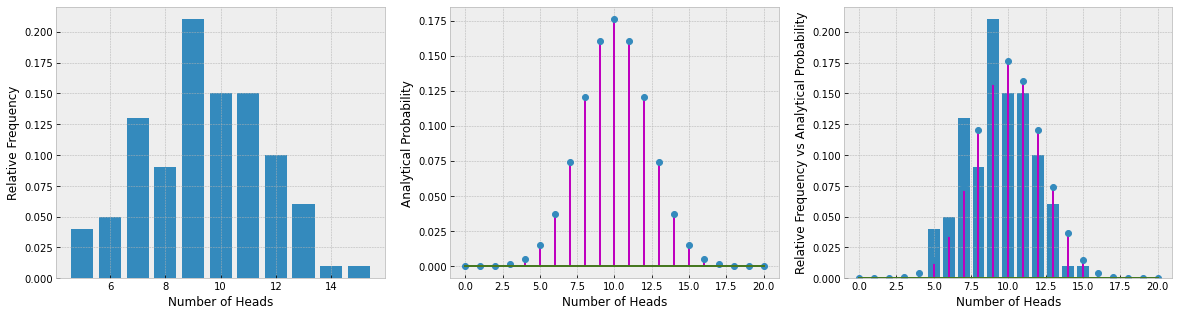

No. Heads | Relative Freq. | Analytic Probability
5 	 0.04 	 9.5367431640625e-07
6 	 0.05 	 1.9073486328125e-05
7 	 0.13 	 0.0001811981201171875
8 	 0.09 	 0.001087188720703125
9 	 0.21 	 0.004620552062988281
10 	 0.15 	 0.0147857666015625
11 	 0.15 	 0.03696441650390625
12 	 0.1 	 0.0739288330078125
13 	 0.06 	 0.12013435363769531
14 	 0.01 	 0.16017913818359375
15 	 0.01 	 0.17619705200195312


In [9]:
fig = plt.figure(figsize=(20,5))

# Counting - Observed Relative Frequencies
vals, counts = np.unique(num_heads, return_counts=True)
plt.subplot(1,3,1)
plt.bar(vals, counts/num_sims)
plt.xlabel('Number of Heads')
plt.ylabel('Relative Frequency')


# Analytical probability
plt.subplot(1,3,2)
plt.stem(range(flips+1), analytic, 'm')
plt.xlabel('Number of Heads')
plt.ylabel('Analytical Probability')


# Relative Frequencies vs Analytical Probability
plt.subplot(1,3,3)
plt.bar(vals, counts/num_sims)
plt.stem(range(flips+1), analytic, 'm')
plt.xlabel('Number of Heads')
plt.ylabel('Relative Frequency vs Analytical Probability')
plt.show() # forces the plot to be displayed at this stage

print("No. Heads | Relative Freq. | Analytic Probability")
for i in range(len(vals)):
    print(vals[i], '\t', counts[i]/num_sims,'\t',analytic[i])

## 4. Sampling with Replacement and without Ordering

Suppose that we want to sample from the set $A=\{a_1,a_2,\dots,a_n\}$ $k$ times such that repetition is allowed and ordering does not matter. For example, if $A=\{1,2,3,4,5,6\}$ is the sample space of rolling a 6-sided fair die and $k=2$, then there are 21 differet ways of doing this

\begin{equation*}
\{(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (2,2), (2,3), (2,4), (2,5), (2,6), (3,3), (3,4), (3,5), (3,6), (4,4), (4,5), (4,6), (5,5), (5,6), (6,6)\}
\end{equation*}

* How can we get the number 21 without actually listing all the possibilities? 

One way to think about this is to note that any of the pairs in the above list can be represented by the number of 1's, 2's, 3's, 4's, 5's and 6's it contains. That is, if $x_i$ is the number of face $i$, we can equivalently represent each pair by a vector $(x_1,x_2,x_3,x_4,x_5,x_6)$, for example,

\begin{align*}
(1,5) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (1,0,0,0,1,0)\\
(2,2) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (0,2,0,0,0,0)\\
(3,4) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (0,0,1,1,0,0)\\
(5,5) &\rightarrow (x_1,x_2,x_3,x_4,x_5,x_6) = (0,0,0,0,2,0)
\end{align*}

Note that here $x_i \geq 0$ are integers and $x_1+x_2+x_3+x_4+x_5+x_6 = k = 2$. Thus, we can claim that the number of ways we can sample two elements from the set $A=\{1,2,3,4,5,6\}$ such that ordering does not matter and repetition is allowed is the same as solutions to the following equation

$$x_1+x_2+x_3+x_4+x_5+x_6 = 2\text{, where } x_i\in\{0,1,2\}$$

This is an interesting observation and in fact using the same argument we can make the following statement for general $k$ and $n$.

<div class="alert alert-info">
    <b>Sampling with Replacement and without Ordering (Partitions)</b>
    
The number of $k$-multisets of an $n$-set $A=\{a_1,a_2,\cdots,a_n\}$ **with replacement** and **without ordering** are binomial coefficients of the form:

$$\binom{n + k - 1}{k} = \binom{k + n - 1}{n-1}$$
</div>

**Bonus Material:** https://www.youtube.com/watch?v=UTCScjoPymA

**<font color=blue>Example 2:</font> What is the probability of a roll of 11 when rolling fair 6-sided dice twice?**

In [52]:
binom(6+2-1,2), binom(2+6-1,6-1)

(21.0, 21.0)

In [55]:
print('Probability of a roll of 11 when rolling a 6-sided die twice is ', 1/21)
# This is corrected. 

Probability of a roll of 11 when rolling a 6-sided die twice is  0.047619047619047616


___

In [12]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Bayes' Rule

Consider two events $A$ and $B$, by the **chain rule** equations we know that: 

$$P(A\cap B) = P(A|B)P(B)$$
and
$$P(B\cap A) = P(B|A) P(A)$$

Note that 

\begin{align*}
P(A\cap B) &= P(B\cap A)\\
\iff P(A|B)P(B) &= P(B|A) P(A)\\
\iff P(A|B) &= \frac{P(B|A) P(A)}{P(B)}
\end{align*}

<div class="alert alert-info" role="alert">
  <strong>Bayes's Theorem</strong>
    
If the set of events $\{A_i\}_{i=1}^n$ partitions the sample space $\Omega$, and assuming $P(A_i)>0$, for all $i$. Then, for any event $B$ such that $P(B)>0$, we have

\begin{align*}
P(A_i|B) &= \frac{P(B|A_i)P(A_i)}{P(B)}
\end{align*}

where $P(B)$ can be computed using the Law of Total Probability,
  
\begin{align*}
P(B) &= P(B|A_1)P(A_1) + \cdots +P(B|A_n)P(A_n)
\end{align*}

</div>

**<font color=blue>Example 3:</font> Consider the experiment where we select between a fair 6-sided die and a fair 12-sided die at random and flip it once. What is the probability that the die selected was the 12-sided die if face on top was a 5?**

<!-- Let $S$ be the event that the fair 6-sided die was selected, $T$ the event that the fair 12-sided die was selected, and $D_i$ the event that the face $i$ was rolled.

$$P(T|D_5) = \frac{P(T\cap D_5)}{P(D_5)} = \frac{P(D_5|T)P(T)}{P(D_5)}$$

and

$$P(D_5) = P(D_5|S)P(S) + P(D_5|T)P(T) = \frac{1}{6}\times\frac{1}{2} + \frac{1}{12}\times\frac{1}{2} = 0.125$$

Putting it together,

$$P(T|D_5) = \frac{P(D_5|T)P(T)}{P(D_5|S)P(S) + P(D_5|T)P(T)} = \frac{\frac{1}{12}\times\frac{1}{2}}{\frac{1}{6}\times\frac{1}{2} + \frac{1}{12}\times\frac{1}{2}}=\frac{1}{3}$$ -->

In [13]:
num_sims=100_000
dice = ['6-sided','12-sided']
face5_count = 0
die12_count = 0
for sim in range(num_sims):
    coin = random.choice(dice) # choose die at random
    if coin=='6-sided':
        S=list(range(1,7))
    else:
        S=list(range(1,13))
    flip = random.choice(S) # roll the die
    if flip==5: 
        face5_count+=1
        if coin == '12-sided':
            die12_count+=1
print('Probability that die is 12-sided if observed result is 5 is ',
      die12_count/face5_count)

Probability that die is 12-sided if observed result is 5 is  0.3339709867686912


* Bayes's rule is an extremely useful theorem and is often used for **statistical inference**.

There are a number of *causes* that may result in a certain *effect*. We observe the effect, and we wish to infer the cause.

* The events $A_1, A_2,\dots,A_n$ can be characterized as a set of possible causes, and
* The event $B$ represents the effect

The probability $P(B|A_i)$ computes the probability that the effect $B$ will be observed when the cause $A_i$ is present. This amounts to a probabilistic model for a cause-effect relationship.

Given that the effect $B$ has occurred, we want to evaluate the probability $P(B|A_i)$ that the cause $A_i$ is present.

* We refer to $P(A_i|B)$ as the **<font color=green>posterior probability</font>** of event $A_i$ given the information

* We refer to $P(A_i)$ as the **<font color=orange>prior probability</font>**

* We refer to $P(B|A_i)$ as the **<font color=blue>likelihood</font>**

* We refer to $P(B)$ as the **<font color=brown>evidence/effect probability</font>**

**<font color=blue>Example 4 [skip]:</font> A test for a certain rare disease is assumed to be correct 95% of the time: if a person has the disease, the test results are positive with probability 0.95, and if the person does not have the disease, the test results are negative with probability 0.95. A random person drawn from a certain *population* has probability 0.001 of having the disease. Given that the person just tested positive, what is the probability that the person has the disease?**

<!-- Let $A$ be the event that the person has the disease, $B$ the event that the test results are positive. We are given that $P(B|A) = 0.95$ and $P(A) = 0.001$. We want to compute $P(A|B)$.

\begin{align*}
P(A|B) &= \frac{P(B|A)P(A)}{P(B)}\\
&= \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\overline{A})P(\overline{A})}\\
&= \frac{0.95 \times 0.001}{0.95\times 0.001 + 0.05\times 0.999}\\
&\approx 0.0187
\end{align*} -->

# Bayesian Statistics vs Classic Statistics

The Bayes' theorem is an *extremely* useful result, formulated by Thomas Bayes in the 18th century and later published by Richard Price.

This result originated the term **Bayesian statistics** or **Bayesian inference**, giving a different interpretation of probability when compared to **classic statistics** or **Frequentist inference**.

* **Frequentist statistics**: refers to the field of statistics that draws conclusions from data by computing relative frequency of events in the data.

* **Bayesian statistics**: refers to the field of statistics that draws conclusions from data by testing out the hypothesis and computing their observed probability from data.

In **inference**, Bayes' rule makes use of a **prior** which is an assumption made about some underlying phenomenon. Bayes' equation makes use of this prior probability to compute the probability of such cause given some observational data.

Whereas in classical inference, no assumption are made about the underlying nature of the system that generated the observational data. It's inference is purely based on how the frequency of outcomes.

![ThomasBayes](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif)
Thomas Bayes (1701-1761), [Wikipedia page](https://en.wikipedia.org/wiki/Thomas_Bayes)

**Which statistical approach should I use to draw conclusions from my data?** We will see that it *depends* on
1. the problem
2. the actual quantity (and quality) of the observational data that you have
3. whether or not you have prior beliefs
4. other factors

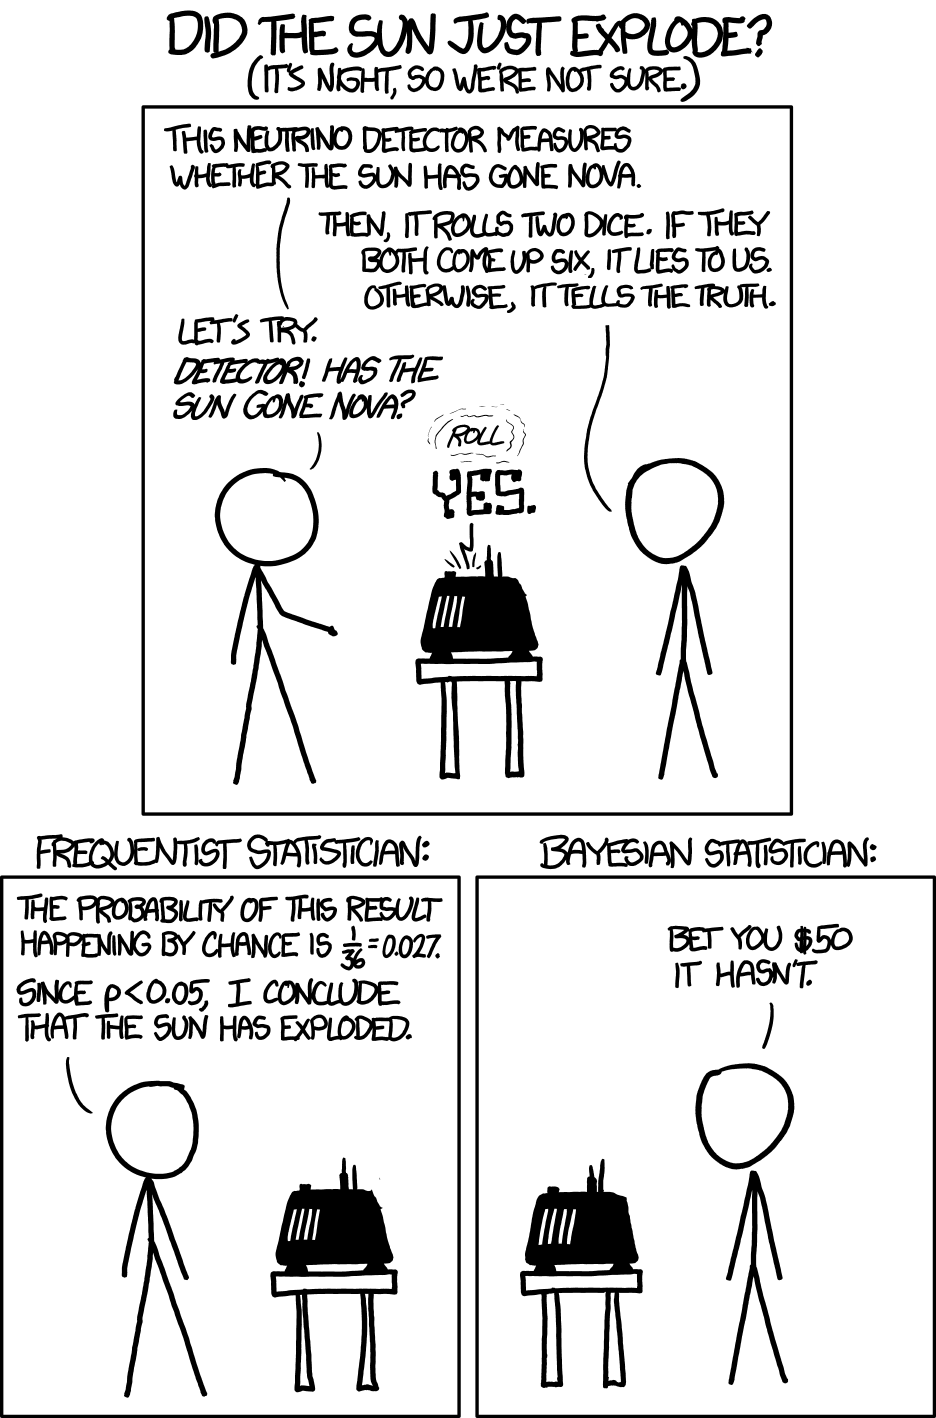

In [14]:
from IPython.display import Image
Image('https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png',width=500)

**<font color=blue>Example 5:</font> Suppose that I flipped a coin 5 times and observe the event $E=\{H,H,H,H,H\}$. Without telling you anything else, what is the probability of heads? What would your answer be?**

The **hidden state** of this problem is: what coin was used for this experiment?

* Frequentist statistics: $P(H) = \frac{|H|}{|E|} = \frac{5}{5} = 1$. 

It does not use any prior beliefs.

* Bayesian statistics: you start by assuming that chances are e.g. I'm flipping a fair coin - this is your prior belief, that the coin is fair, then $P(H|\text{fair})=\frac{1}{2}$, furthermore you also compute a probability for that hypothesis:

\begin{align*}
P(\text{fair}| E) &= \frac{P(E|\text{fair})P(\text{fair})}{P(E)}\\
&= \frac{P(E|\text{fair})P(\text{fair})}{P(E|\text{fair})P(\text{fair})+P(E|\text{unfair})P(\text{unfair})}\\
&= \frac{\left(\frac{1}{2}\right)^5\times\frac{1}{2}}{\left(\frac{1}{2}\right)^5\times\frac{1}{2}+(1)^5\times\frac{1}{2}}, \text{ assuming you believe it to be 50/50 between fair and 2-headed}\\
&\approx 0.0303
\end{align*}

If you thought I had 2 fair coin and 1 2-headed, then the probability for fair coin is $\frac{2}{3}$ and probability for 2-headed was $\frac{1}{3}$. With this, the probability of the hypothesis/cause "coin is fair" is:

$$P(\text{fair}| E) = \frac{\left(\frac{1}{2}\right)^5\times\frac{2}{3}}{\left(\frac{1}{2}\right)^5\times\frac{2}{3}+(1)^5\times\frac{1}{3}} \approx 0.0588$$

Note that a **stronger (prior) belief** influenced the probability of your **hypothesis**.

**This is where the (healthy) "rivalry" between Frequentist vs Bayesian emerges:**

* Frequentists say that we should never make assumptions (prior beliefs) because they will change the probability of the hypothesis. Frequestists support that the use of the observational data is the approach to take conclusions. Frequentist approach to probability is **data-driven**.

* Bayesians say that in situations where we do not have enough data, it is prudent to make assumptions as the conclusions will become more "realistic".

There are strategies to adjust the prior belief (correct its value to a *better* value) as we continue to collect more observations. We will study this.

## Applications of Bayesian Inference

Applications of Bayesian inference are endless. These are some examples:

1. Decision theory, e.g. communication system (example next lecture)

2. Bioinformatics and healthcare, e.g. building a risk model from genetic profiles

3. Recommender systems, e.g. Netflix

4. Stock market prediction

5. Email spam filter

6. Financing, e.g. banks are using Bayesian inference to determine interest rates of a loan by using a risk model

8. many, many others...

___

# Exploratory Data Analysis

*A first look at the data*.

<div class="alert alert-success">
    <b>Exploratory Data Analysis</b>
    
**Exploratory data analysis** or **EDA** is a critical first step in analyzing the data from an experiment. Here are the main reasons we use EDA:
* detection of mistakes
* checking of assumptions
* preliminary selection of appropriate models
* determining relationships among the explanatory variables, and
* assessing the direction and rough size of relationships between explanatory and outcome variables.

Loosely speaking, any method of looking at data that does not include formal statistical modeling and inference falls under the term exploratory data analysis.
</div>

Exploratory data analysis is generally cross-classified in two ways. First, each method is either 

1. **non-graphical**, or 
2. **graphical**. 

And second, each method is either 
* **univariate**, or 
* **multivariate** (usually just bivariate).

<div class="alert alert-info">
    <b>Types of EDA</b>
    
The four types of EDA are:
* univariate non-graphical
* multivariate non-graphical
* univariate graphical
* multivariate graphical
</div>

Non-graphical methods generally involve calculation of **summary statistics**, while graphical methods obviously summarize the data in a diagrammatic or pictorial way. 

* Univariate methods look at one variable (data column) at a time, while multivariate methods look at two or more variables at a time to explore relationships. 
    * Usually our multivariate EDA will be bivariate (looking at exactly two variables), but occasionally it will involve three or more variables. 
    * *It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.*

## Univariate Data

The data that come from making a particular measurement on all of the subjects in a sample represent our observations for a single characteristic such as age, gender, speed at a task, or response to a stimulus. 

We should think of these measurements as representing a *sample distribution* of the variable, which in turn more or less represents the *population distribution* of the variable. 

The usual goal of univariate non-graphical EDA is to better appreciate the *sample distribution* and also to make some tentative conclusions about what population distribution(s) is/are compatible with the sample distribution. 

* Outlier detection is also a part of this analysis.

<div class="alert alert-info">
    <b>Population</b>
    
A **population** is a group of people, objects, events or observations that is being studied.
</div>

<div class="alert alert-info">
    <b>Parameters</b>
    
Often we are trying to assess some qualities or properties of that population. We call these **parameters**.
</div>

When the population is too large to directly measure the parameters of interest, then we try to draw inferences from a subset of the population.

<div class="alert alert-info">
    <b>Sample</b>
    
A **sample** from a population is a subset of the population that can be used to draw inferences about the parameters of interest.
</div>

* A sample is usually drawn randomly from the population.

* We usually require that each member of the sample is chosen independently from other members.

* Often, but not always, each member in the population is equally likely to be included in the sample.

<div class="alert alert-info">
    <b>Statistic</b>
    
A **statistic** is a measurement of a quality or property on a sample that is used to assess a parameter of the whole population.
</div>

When samples are small, the statistics often provide little or no information about the parameters.

* For example, consider the problem of determining whether a coin is fair or two-headed. The result of flipping a coin one time provides no useful information for determining that

When samples are larger, they generally more accurately represent the population.

In practice, when dealing with data, there are generally two cases that we will encounter:

1. When designing an experiment, the statistician can choose the sample size to balance between being able to generate a useful statistic and the cost of taking more samples.

2. Sometimes the experiment has already been carried out or is not under the control of the statistician. For instance, the statistician wants to assess something based on an existing survey or compare effects of a change in laws on a set of states. In this case, the sample size is fixed.

___

### Example: Effect of 1994-2004 Federal Assault Weapon Ban

In 1994, the United States Congress passed a ban on a variety of semiautomatic rifles that are sometimes referred to as "assault weapons". The ban was in effect for 10 years, from 1994-2004. ([State Firearm Laws](https://www.statefirearmlaws.org/resources))

It might be guessed that the goal of any gun ban is to reduced gun violence. Thus it is natural to assess whether the "assault weapon" ban had any effect on gun violence.

Fortunately, the Center for Disease Control's National Center for Health Statistics tracks firearm mortality at the state level. Visualizations of firearm mortality by state, along with links to download the data are available here:

https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm

Although this page does not have data prior to 2005, the data for 2005 should be similar to that before the ban because the ban was only on the **sale** of certain firearms. It would take many years for this ban to actually affect the availability of firearms.

Thus, we can use two sets of data on that page to measure the effect of the "assault weapons" ban:

* The 2005 data set represents firearm mortality after the ban had been in effect for a decade
* The 2014 data set represents firearm mortality after the ban had been seized for a decade

I have download this data and it is saved in the file called **"firearms-combined.csv"**.

**Make sure you have the CSV file wherever you are working on this notebook!**

Now let's read the data from the CSV file into a dataframe:

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('firearms-combined.csv')

In [17]:
df

,STATE,RATE-2005,RATE-2014,Total Laws 2014
0,AL,16.0,16.9,10
1,AK,17.5,19.2,3
2,AZ,16.1,13.5,8
3,AR,15.7,16.6,11
4,CA,9.5,7.4,100
5,CO,11.6,12.2,30
6,CT,5.3,5.0,85
7,DE,8.8,11.1,38
8,FL,10.0,11.5,21
9,GA,12.1,13.7,6


* Death rates are measured per 100,000 total population.

In [18]:
df.columns

Index(['STATE', 'RATE-2005', 'RATE-2014', 'Total Laws 2014'], dtype='object')

Let's access the sample values for columns "RATE-2005" and "RATE-2014":

In [19]:
df['RATE-2005']

0     16.0
1     17.5
2     16.1
3     15.7
4      9.5
5     11.6
6      5.3
7      8.8
8     10.0
9     12.1
10     2.1
11    14.1
12     8.0
13    11.2
14     6.7
15     9.3
16    13.0
17    18.5
18     7.8
19    11.9
20     3.4
21    10.8
22     7.0
23    16.0
24    12.9
25    16.9
26     7.7
27    16.1
28     6.6
29     5.2
30    13.9
31     5.3
32    12.8
33     8.8
34     9.6
35    13.2
36    10.7
37    10.8
38     3.6
39    13.8
40    10.2
41    16.0
42    11.1
43    10.1
44     6.8
45    11.5
46     8.8
47    13.8
48     8.5
49    13.4
Name: RATE-2005, dtype: float64

In [20]:
df['RATE-2005'].to_numpy()

array([16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
       14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
        7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
        8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
        6.8, 11.5,  8.8, 13.8,  8.5, 13.4])

In [21]:
# Note that I went directly to a numpy array here, instead of making a list first
# The reason for using a numpy array is that we want to apply numpy methods for 
# computing statistics further below!

rate2005 = df['RATE-2005'].to_numpy()
rate2014 = df['RATE-2014'].to_numpy()

## Histograms

A common visualization is to look at a histogram of the data. Unlike the histograms we previously generated, this data takes on **real values**, not just integers. Fortunately, ```matplotlib``` has functions to do the hard work of making histograms for us:

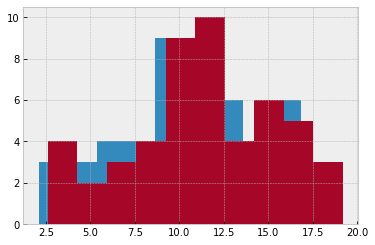

In [22]:
plt.hist(rate2005)
plt.hist(rate2014);

Some styling will help make this more legible:

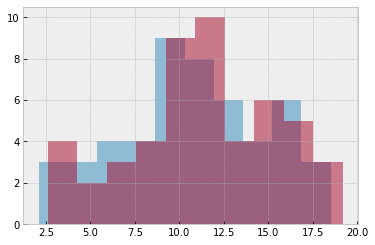

In [23]:
plt.hist(rate2005, alpha=0.5)
plt.hist(rate2014, alpha=0.5);

Each bar of the histogram represents a "bin" of data values. In fact, the counts and bin edges are returned by the hist function. We can easily change the number of bins to provide more resolution:

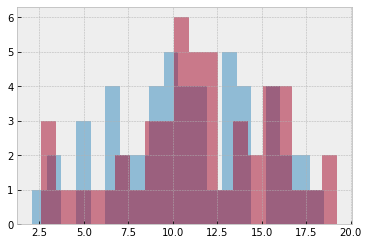

In [24]:
plt.hist(rate2005, alpha=0.5, bins=20)
plt.hist(rate2014, alpha=0.5, bins=20);

Let's add some information to make this more useful:

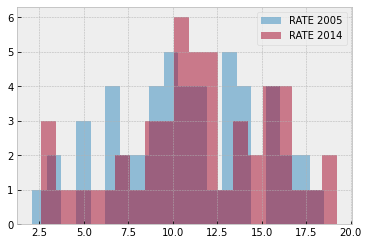

In [25]:
plt.hist(rate2005, alpha=0.5, bins=20, label='RATE 2005')
plt.hist(rate2014, alpha=0.5, bins=20, label='RATE 2014')
plt.legend();

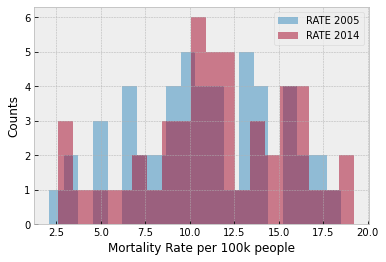

In [26]:
plt.hist(rate2005, alpha=0.5, bins=20, label='RATE 2005')
plt.hist(rate2014, alpha=0.5, bins=20, label='RATE 2014')
plt.legend()
plt.xlabel('Mortality Rate per 100k people')
plt.ylabel('Counts');

* **What *inferences* might you make from this plot?**

However, it does not make sense to make the number of bins very large compared to the data size.

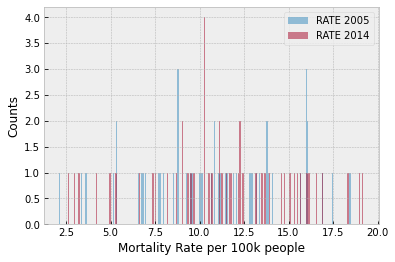

In [27]:
plt.hist(rate2005, alpha=0.5, bins=200, label='RATE 2005')
plt.hist(rate2014, alpha=0.5, bins=200, label='RATE 2014')
plt.legend()
plt.xlabel('Mortality Rate per 100k people')
plt.ylabel('Counts');

## Summary Statistics

Summary statistics are values calculated from sample data that measure some characteristic about the data.

* **What is the most common summary statistic?**

The **average** or **sample mean**. I **strongly** prefer the word average for the statistic computed from a set of data. 

We will use the word **mean** to refer to a type of average for random phenomena, when we do not have specific samples for those values. 

* What does the **average** or **sample mean** mean?

    1. The value where most of the data "sits" is centered around
    
    2. The value that has minimum distance from every value
    
    3. Value most likely to occur
    
    4. Value that divides group into 2 sets of equal size 

Both ```pandas``` and ```numpy``` provide methods to calculate the average:

In [28]:
df['RATE-2005'].mean() #average

10.81

In [29]:
df['RATE-2014'].mean()

11.440000000000003

In [30]:
# Average over numpy arrays

rate2005.mean()

10.809999999999997

In [31]:
rate2014.mean()

11.44

In [32]:
np.mean(rate2005)

10.809999999999997

In [33]:
np.mean(rate2014)

11.44

Other **summary statistics** are used to summarize a set of observations, the most common ones are:

1. **Average** - the value where most of the data "sits" is centered around

2. **Size** - number of observations in the sample data

3. **Count** - number of non-empty observations in the sample data

4. **Median** - the "middle number" of the sorted sample data values

5. **Standard deviation** - is a measure of dispersion; it measures the average distance between a single observation and the average value

6. **Quartiles** - the boundary values for the lowest, middle and upper quarters of the sample data

7. **Inter-Quantile Range (IQR)** - where the "middle fifty" percent of the data is

In ```pandas``` we can print a summary statistic table this way:

In [34]:
df

,STATE,RATE-2005,RATE-2014,Total Laws 2014
0,AL,16.0,16.9,10
1,AK,17.5,19.2,3
2,AZ,16.1,13.5,8
3,AR,15.7,16.6,11
4,CA,9.5,7.4,100
5,CO,11.6,12.2,30
6,CT,5.3,5.0,85
7,DE,8.8,11.1,38
8,FL,10.0,11.5,21
9,GA,12.1,13.7,6


In [35]:
df.describe()

,RATE-2005,RATE-2014,Total Laws 2014
count,50.000000,50.000000,50.000000
mean,10.810000,11.440000,26.480000
std,3.940644,4.149748,26.142654
min,2.100000,2.600000,3.000000
25%,8.125000,9.100000,9.250000
50%,10.800000,11.400000,14.500000
75%,13.700000,14.750000,35.250000
max,18.500000,19.200000,101.000000


A good graphical descriptor that displays a few of these summary statistics is the **boxplot** or **whisker plot**:

![boxplot](https://www.simplypsychology.org/boxplot.jpg)

We can use the ```matplotlib``` to display a boxplot:

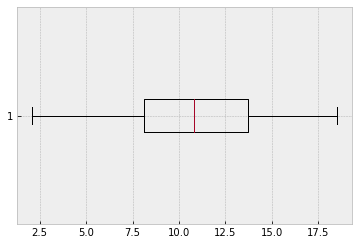

In [36]:
plt.boxplot(df['RATE-2005'].to_numpy(), vert=False)
plt.grid(True);

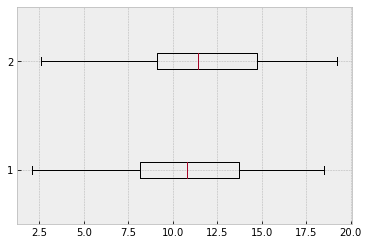

In [37]:
plt.boxplot(df[['RATE-2005','RATE-2014']].to_numpy(), vert=False)
plt.grid(True);

Or we can use built-in ```pandas``` graphic visualizations directly on dataframes:

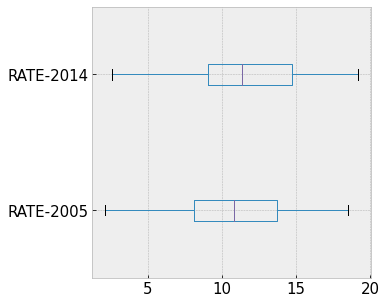

In [38]:
df[['RATE-2005', 'RATE-2014']].boxplot(vert=False, figsize=(5,5), fontsize=15);

* **What *inferences* might you make from this plot?**

The sample mean of the 2014 data set is larger than that for the 2005 data set. This may indicate that the overturn of the assault weapon ban in 2014 is associated with an increase in firearms mortality.

However, the difference is relatively small, as are the sample sizes (50).

In [39]:
diff = rate2014.mean() - rate2005.mean()

diff

0.6300000000000026

By performing EDA, we have gathered a lot of information and we may want to start answering some questions that require statistical hypothesis testing and modeling. 

* For example, for the firearm law example, we may *hypothesize* that the observed average difference are just based on random sampling from the underlying population, that is that the ban did not have an effect on firearm mortality rate.

___

# Binary Hypothesis Testing

* The *null hypothesis* is that there is no real difference between the two data sets, and any differences are just based on random sampling from the underlying population.

So, let's **assume that the two samples are from the same population**. 

* By combining the samples (called **pooling**), we get a new subset of the original population, if the null hypothesis is true. Moreover, any sample from this better represents the original population than either of the samples.

* We can check whether the null hypothesis is true by checking how often samples from the pooled data set have a difference in means as large as the one observed.

<div class="alert alert-info">
    <b>Pooling</b>
    
**Pooling** describes the practice of gathering together small sets of data that are assumed to have been *drawn* from the same underlying population and using the combined larger set (the *pool*) to obtain a more precise estimate of that population.
</div>

## Sampling

**The big question:** to sample **with replacement** or **without replacement**?

<div class="alert alert-info">
    <b>Bootstrapping</b>
    
**Sampling with replacement** from a pooling set is called **bootstrapping** and is the most popular resampling technique. It is meant to better emulate independent sampling from the original population.
</div>

<div class="alert alert-info">
    <b>Permutations</b>
    
**Sampling without replacement** from a pooling set better emulates **permutation** tests, where we check every possible reordering of the data into samples. This will be discussed more later.
</div>

* Generally, *sampling without replacement* is more conservative (produces a higher $p$-value) than bootstrapping. 
* Bootstraping is **easy** and **most popular**, and we apply it here.

**The Bootstrap Idea:** The original sample approximates the population from which it was drawn. So *resamples* from this sample approximate what we would get if we took many samples from the population. The bootstrap distribution of a statistic, based on many resamples, approximates the sampling distribution of the statistic, based on many samples.

___

### Bootstrap Model 1

In [40]:
pooled = np.concatenate((rate2005, rate2014))
pooled

array([16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
       14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
        7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
        8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
        6.8, 11.5,  8.8, 13.8,  8.5, 13.4, 16.9, 19.2, 13.5, 16.6,  7.4,
       12.2,  5. , 11.1, 11.5, 13.7,  2.6, 13.2,  9. , 12.4,  7.5, 11.3,
       13.9, 19. ,  9.4,  9. ,  3.2, 11.1,  6.6, 18.3, 15.3, 16.1,  9.5,
       14.8,  8.7,  5.3, 16. ,  4.2, 11.8, 12.3, 10.3, 15.7, 11.7, 10.5,
        3. , 15.5, 10.3, 15.1, 10.7, 12.3, 10.3, 10.3,  9.7, 14.6,  8.2,
       16.2])

In [41]:
print(pooled.size, len(pooled), pooled.shape)

100 100 (100,)


* How would we randomly choose from this data **with replacement**?

* And, if each resample is a new sample, which size should the resample have?

In [42]:
# resample for, for example, rate-2005
print(random.choices(pooled, k=50))

[10.2, 13.2, 19.0, 16.6, 16.6, 8.7, 13.9, 11.5, 14.6, 16.1, 10.5, 9.6, 8.8, 11.7, 11.1, 12.8, 11.3, 5.3, 8.2, 12.2, 12.3, 13.9, 10.3, 16.1, 11.8, 16.1, 8.0, 13.8, 6.6, 12.1, 12.9, 8.7, 16.1, 16.9, 8.8, 13.9, 10.3, 16.9, 8.0, 15.7, 7.4, 19.2, 14.8, 6.8, 9.7, 10.3, 12.4, 13.9, 8.8, 11.7]


Recall that ```numpy.random``` has a similar method:

In [43]:
npr.choice(pooled, size=50)

array([11.8, 15.5, 16. ,  8. ,  6.6, 11.3, 12.2, 15.7, 10.7,  5.3, 16. ,
       10. , 15.7,  6.6, 13.9,  7. ,  3.2,  5.3,  6.7, 16. ,  5.3, 15.7,
       16.9, 13.4, 13.4,  8. ,  8.8, 10.8,  7.8, 13. , 11.1, 16.1, 13.8,
       15.7, 12.2, 17.5,  2.6, 11.1,  5.2,  9.6,  8.8,  5. , 12.2,  5.3,
       11.2,  9.4, 13.8, 14.8, 10.2, 15.1])

For a significance level of $\alpha = 0.05$, let's build a Bootstrap simulation to compute the probability of observing a mean difference of 0.63 or larger:

In [60]:
num_sims=10_000
event_count=0

for sim in range(num_sims):
    resample05 = npr.choice(pooled, size=50) # Bootstrap, sampling from pooling with replacement
    resample14 = npr.choice(pooled, size=50) 
    
    # Computes resample averages
    mean05 = resample05.mean()
    mean14 = resample14.mean()
    
    # statistic - difference of the sample averages
    resample_diff = mean14 - mean05
    
    # Compare the resampled statistic with the observed statistic value (diff)
    # We want to count extreme events, i.e., observing a resampled 
    #statistic larger or equal then the original one
    if abs(resample_diff) >= diff: # 2-sided hypothesis test 
        event_count+=1
    
    
print("Under null hypothesis, observe effect this large with prob. ", event_count/num_sims)
print('p-value = ',event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  0.4353
p-value =  0.4353


* **What is the conclusion?**

    * **Is the result statistically significant?** No, because the p-value is larger than $\alpha=0.05$.
    * **Can we reject the null hypothesis?** No, "we cannot reject the null hypothesis".
    * **Conclusion:** The data suggests that the ban did not have an effect of firearm mortality rate.

### Bootstrap Model 2

A more reasonable bootstrap approach would be to randomly assign values from 2005 or 2014 **for each state** and then assess the difference:

In [45]:
stacked_data = np.vstack((rate2005, rate2014)).T

stacked_data.shape

(50, 2)

In [46]:
# Alternative: Use the Pandas library

stacked_data = df[['RATE-2005', 'RATE-2014']].to_numpy()

stacked_data.shape

(50, 2)

In [47]:
stacked_data

array([[16. , 16.9],
       [17.5, 19.2],
       [16.1, 13.5],
       [15.7, 16.6],
       [ 9.5,  7.4],
       [11.6, 12.2],
       [ 5.3,  5. ],
       [ 8.8, 11.1],
       [10. , 11.5],
       [12.1, 13.7],
       [ 2.1,  2.6],
       [14.1, 13.2],
       [ 8. ,  9. ],
       [11.2, 12.4],
       [ 6.7,  7.5],
       [ 9.3, 11.3],
       [13. , 13.9],
       [18.5, 19. ],
       [ 7.8,  9.4],
       [11.9,  9. ],
       [ 3.4,  3.2],
       [10.8, 11.1],
       [ 7. ,  6.6],
       [16. , 18.3],
       [12.9, 15.3],
       [16.9, 16.1],
       [ 7.7,  9.5],
       [16.1, 14.8],
       [ 6.6,  8.7],
       [ 5.2,  5.3],
       [13.9, 16. ],
       [ 5.3,  4.2],
       [12.8, 11.8],
       [ 8.8, 12.3],
       [ 9.6, 10.3],
       [13.2, 15.7],
       [10.7, 11.7],
       [10.8, 10.5],
       [ 3.6,  3. ],
       [13.8, 15.5],
       [10.2, 10.3],
       [16. , 15.1],
       [11.1, 10.7],
       [10.1, 12.3],
       [ 6.8, 10.3],
       [11.5, 10.3],
       [ 8.8,  9.7],
       [13.8,

Now, we want to a special kind of array indexing: **fancy indexing**.

In [61]:
a = npr.randint(2, size=50)
a

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0])

In [64]:
b = stacked_data[range(50),a] # 2-D Fancy indexing

In [67]:
b

array([16. , 19.2, 13.5, 15.7,  9.5, 11.6,  5. , 11.1, 10. , 12.1,  2.6,
       13.2,  9. , 12.4,  7.5, 11.3, 13.9, 18.5,  7.8, 11.9,  3.4, 10.8,
        6.6, 16. , 15.3, 16.1,  7.7, 14.8,  6.6,  5.3, 16. ,  5.3, 11.8,
        8.8,  9.6, 15.7, 10.7, 10.8,  3. , 15.5, 10.3, 16. , 10.7, 12.3,
        6.8, 11.5,  8.8, 14.6,  8.5, 13.4])

For a significance level of $\alpha = 0.05$, let's build a Bootstrap simulation to compute the probability of observing a mean difference of 0.63 or larger:

In [50]:
num_sims=10_000
event_count=0

for sim in range(num_sims):
    resample05 = stacked_data[range(50), npr.randint(2, size=50)] # 2-D Fancy indexing
    resample14 = stacked_data[range(50), npr.randint(2, size=50)]
    
    mean05 = resample05.mean()
    mean14 = resample14.mean()
    
    sample_diff = mean14-mean05
    
    if abs(sample_diff)>= diff: # 
        event_count+=1
    

print("Under null hypothesis, observe effect this large with prob. ",event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  0.0001


* **What is the conclusion?**

    * **Is the result statistically significant?** Yes, because the p-value is smaller than $\alpha=0.05$.
    * **Can we reject the null hypothesis?** Yes, we reject the null hypothesis.
    * **Conclusion:** Under this interpretation, the restriction on assault weapons is associated with an increase in mean firearms morality.

It depends on how you interpret the data!

### Distribution of the bootstrap mean-difference

Every time we create a bootstrap value for the difference of means, we create a new random value. Let's see how the bootstrap means are distributed by looking at a histogram of those values:

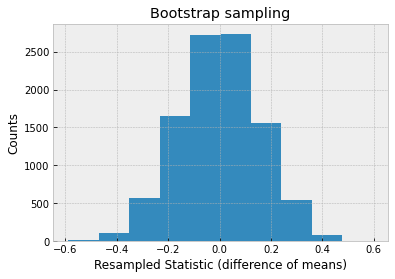

In [51]:
num_sims=10_000
bs_stats=[]

for sim in range(num_sims):
    resample05 = stacked_data[range(50), npr.randint(2, size=50)] # 2-D Fancy indexing
    resample14 = stacked_data[range(50), npr.randint(2, size=50)]
    
    mean05 = resample05.mean()
    mean14 = resample14.mean()
    
    sample_diff = mean14-mean05
    bs_stats += [sample_diff]

    
plt.hist(bs_stats)
plt.xlabel('Resampled Statistic (difference of means)')
plt.ylabel('Counts')
plt.title('Bootstrap sampling');

A few obervations:
    
1. The difference of means has a bell shape -- we saw that before. Why do you think that is?
2. Almost all of the values fall between -0.5 and +0.5. Thus, it is not surprising that getting a mean-difference as large as 0.6 is very rare.

**Topic for later:** The **Central Limit Theorem** (CLT) for sums says that if you keep drawing larger and larger samples and taking their sums, the sums form their own normal distribution (the sampling distribution), which approaches a normal distribution as the sample size increases. 

We can now consider the question: **what values of the mean-difference will make it such that we have 95\% confidence that we should ACCEPT the null hypothesis?**

In [41]:
bs_stats.sort() # sorts (in ascendent order) in place
# bs_stats

In [29]:
np.sum(np.array(bs_stats)<-0.5)

14

In [30]:
len(bs_stats)

10000

So, the percentage of data lying below -0.5 is:

In [31]:
np.sum(np.array(bs_stats)<-0.5)/len(bs_stats)*100

0.13999999999999999

Similarly, the percentage lying above 0.5 is:

In [32]:
np.sum(np.array(bs_stats)>0.5)/len(bs_stats)*100

0.05

In [33]:
100 - 0.14 - 0.05

99.81

Another way to express this is that 99.80% of the data is between $[-0.5, 0.5]$.

This is an example of a **confidence interval**. 

* Confidence intervals offer an alternative to $p$-values that provide more information. 

* When we say a $x$% confidence interval, we usually mean the region such that $(100-x)/2$% of samples will fall below the confidence interval, and $(100-x)/2$% of samples will fall above the confidence interval. 

The confidence interval for a bootstrap statistic cannot be known exactly, but it can be estimated accurately given enough samples of the bootstrap statistic.

# Confidence Intervals

**Procedure for Estimating Confidence Interval for a Bootstrap Statistic**

1. Draw $N$ samples from the pooled data using replacement
2. For each sample(s), compute the desired statistic and store it
3. Sort all of the stored statistics
4. For confidence interval $x$%:
    * the lower bound of the confidence interval is the element in position $N(1-x)/2$
    * the upper bound of the confidence interval is the element in position $N-N(1-x)/2= N \times x/2$

**<font color=blue>Example 1:</font> Compute the 95% confidence interval for the example above.**

In [40]:
bs_stats.sort()
# bs_stats

Find the **position** in the sorted sequence of the lower bound of the confidence interval:

In [35]:
lower = len(bs_stats)*(1-0.95)/2
lower

250.00000000000023

Now find the **value** of the sorted data at that position. That is the lower end of our confidence region:

In [36]:
bs_stats[int(lower)]

-0.3119999999999994

Finding the position of the upper bound of the confidence interval is most easily done using the position of the lower bound:

In [37]:
upper = len(bs_stats) -lower -1
upper

9749.0

In [38]:
bs_stats[int(upper)]

0.3060000000000027

Thus, the 95% confidence interval is $[-0.31, 0.31]$.

**How can confidence intervals be used in place of $p$-values?** 
* Instead of conducting a binary hypothesis test with $\alpha=0.05$, we can compute the 95% confidence interval for the mean difference. Then we observe if the result lies within the 95% confidence interval.

The observed mean-difference value was 0.63. This falls outside the 95% confidence interval $[-0.31,0.31]$. The fact that the observed value is far outside the 95% confidence interval makes it likely that we could have used a stronger criteria (like 99% confidence intervals).